# Used Cars Prices in UK

## Import relevant libraries


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [135]:
prices = pd.read_csv("used_cars_UK.csv")
prices.head(20)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


In [136]:
# Splitting 'title' column into two columns: 'Make', 'Model'
prices['Make'] = prices['title'].str.split(' ').str[0]
prices['Model'] = prices['title'].str.split(' ').str[1]
prices.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Make,Model
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Fabia
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,Vauxhall,Corsa
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,Hyundai,i30
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,Hatch
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,Vauxhall,Corsa


## Data Exploration and Cleaning

In [137]:
# Checking the dimensions of the dataset
print("Dataset dimensions:", prices.shape)

# Overview of the data types
print("\nData Types:\n", prices.dtypes)

#Checking for missing values
missing_values = prices.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Checking for duplicates
duplicated_values = prices.duplicated().sum()
print("\nDuplicated Values:\n", duplicated_values)

Dataset dimensions: (3685, 16)

Data Types:
 Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
Make                  object
Model                 object
dtype: object

Missing Values:
 Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
Make                    0
Model                   0
dtype: int64

Duplicated Values:
 0


### As we have to many missing values to drop all of them we will replace the NaN values instead.
Replace every NaN values to 0

In [138]:
# Drop the 'Unnamed' and title column
prices = prices.drop(columns=['Unnamed: 0', 'title'])

In [139]:
# Drop the L from the Engine column to use the engine size as a float and rename the Engine column to Engine (L)
prices['Engine'] = prices['Engine'].str.replace(r'L', '')
prices.rename(columns={'Engine':'Engine (L)'}, inplace = True)
prices['Engine (L)'] = prices['Engine (L)'].astype(float)
prices.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine (L),Gearbox,Doors,Seats,Emission Class,Service history,Make,Model
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN,SKODA,Fabia
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full,Vauxhall,Corsa
2,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN,Hyundai,i30
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full,MINI,Hatch
4,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN,Vauxhall,Corsa


In [140]:
prices = prices.replace([np.nan], 0)
prices.head(20)

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine (L),Gearbox,Doors,Seats,Emission Class,Service history,Make,Model
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,0,SKODA,Fabia
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full,Vauxhall,Corsa
2,949,137000,2011,0.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,0,Hyundai,i30
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full,MINI,Hatch
4,1000,85000,2013,0.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,0,Vauxhall,Corsa
5,800,124196,2007,3.0,Petrol,Coupe,2.0,Manual,3.0,4.0,Euro 4,0,Hyundai,Coupe
6,798,140599,2008,0.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,Euro 4,0,Ford,Focus
7,1995,90000,2009,0.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,0,Vauxhall,Corsa
8,750,225318,1989,0.0,Petrol,Estate,2.3,Automatic,5.0,0.0,0,0,Volvo,740
9,1299,87000,2008,5.0,Diesel,Hatchback,1.6,Manual,5.0,5.0,Euro 4,0,Peugeot,207


In [141]:
# Reorder the columns
prices.columns

Index(['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
       'Fuel type', 'Body type', 'Engine (L)', 'Gearbox', 'Doors', 'Seats',
       'Emission Class', 'Service history', 'Make', 'Model'],
      dtype='object')

In [142]:
prices = prices.reindex(columns=['Make', 'Model', 'Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners',
       'Fuel type', 'Body type', 'Engine (L)', 'Gearbox', 'Doors', 'Seats',
       'Emission Class', 'Service history'])
prices.head()

,Make,Model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine (L),Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,0
1,Vauxhall,Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,Hyundai,i30,949,137000,2011,0.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,0
3,MINI,Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall,Corsa,1000,85000,2013,0.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,0


## Descriptive Statistics

In [143]:
# Statistical summary of the numerical columns
statistical_summary = prices.describe()
print(statistical_summary)


              Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      3685.000000   
mean    5787.145726    8.132816e+04        2011.835007         1.734057   
std     4480.810572    3.942083e+04           5.092566         1.827033   
min      400.000000    1.000000e+00        1953.000000         0.000000   
25%     2490.000000    5.698400e+04        2008.000000         0.000000   
50%     4000.000000    8.000000e+04        2012.000000         1.000000   
75%     7995.000000    1.030000e+05        2015.000000         3.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

        Engine (L)        Doors        Seats  
count  3685.000000  3685.000000  3685.000000  
mean      1.586649     4.291723     4.853731  
std       0.514909     1.045568     0.745628  
min       0.000000     0.000000     0.000000  
25%       1.200000     3.000000     5.000000  
50%       1.600000     5.000000     5.0000

## Data Visualization and Analysis

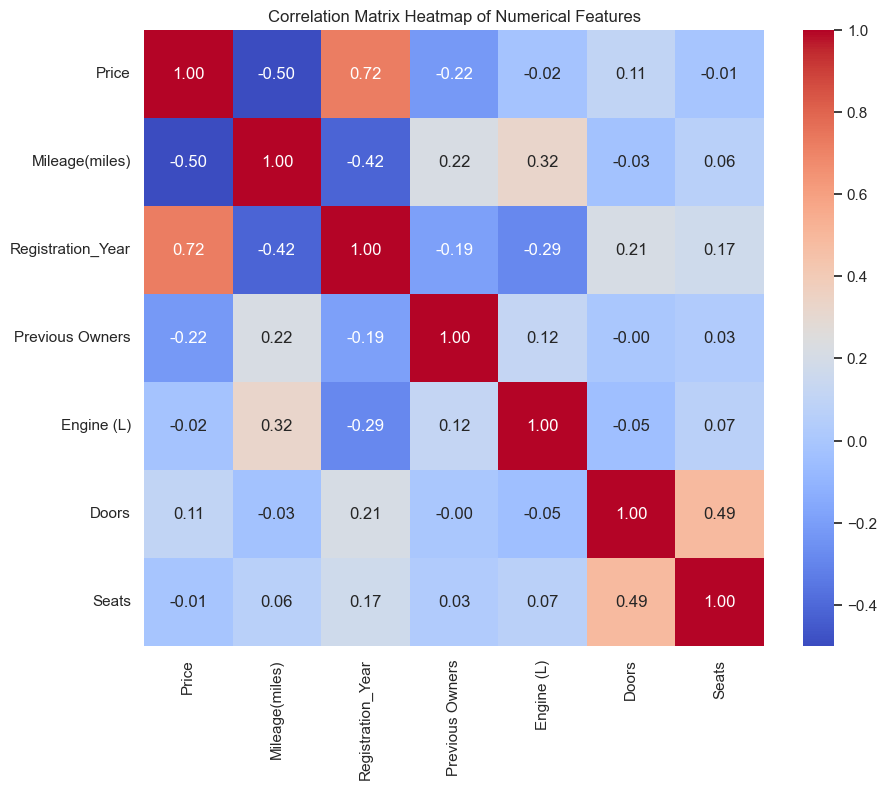

In [144]:
# Selecting only numerical columns for correlation analysis
numerical_cols = prices.select_dtypes(include=['int64', 'float64']).columns
numerical_prices_df = prices[numerical_cols]

# Correlation Analysis
correlation_matrix = numerical_prices_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

## Price Distribution

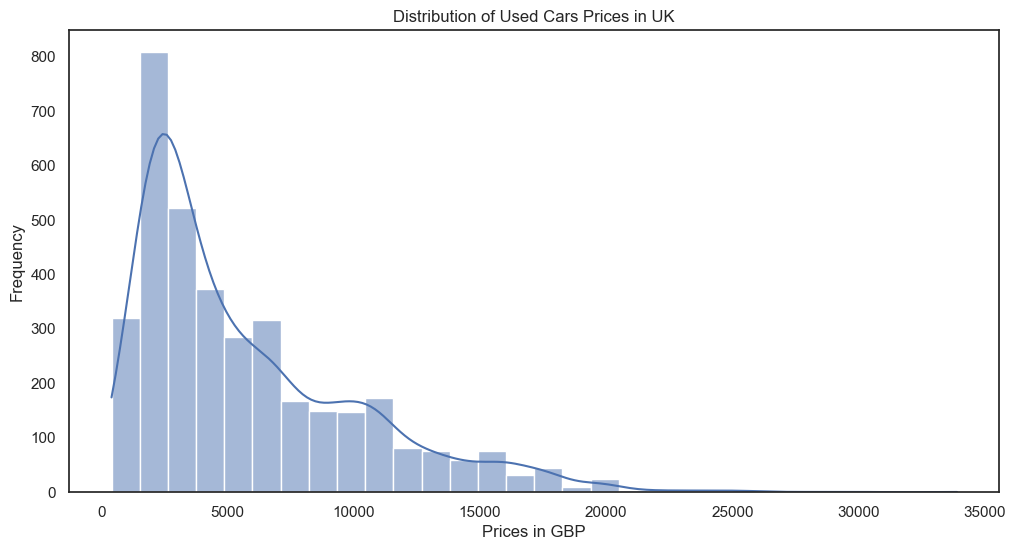

In [145]:
# Price Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(prices['Price'], kde=True, bins=30)
plt.title('Distribution of Used Cars Prices in UK')
plt.xlabel('Prices in GBP')
plt.ylabel('Frequency')
plt.show()

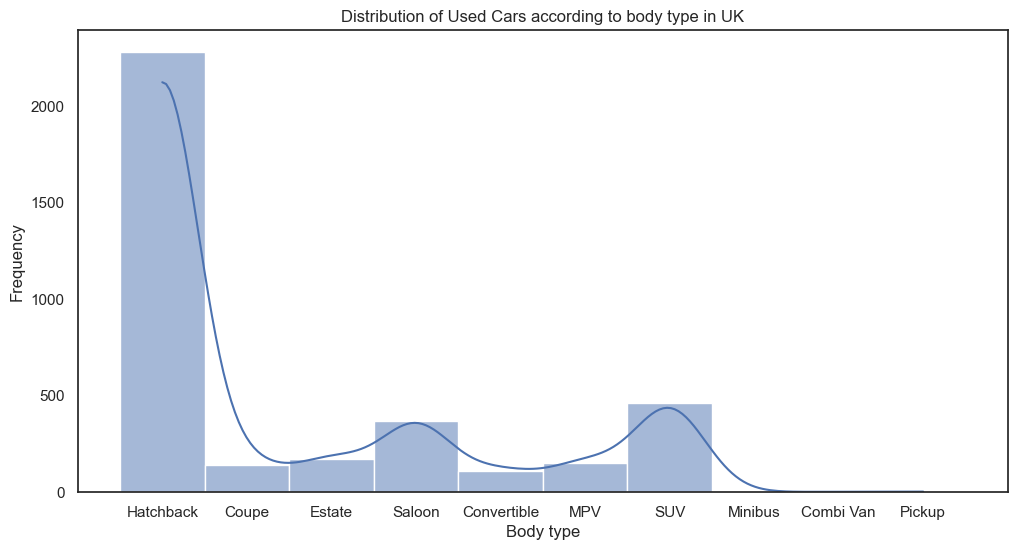

In [146]:
# Distribution According to body type Analysis
plt.figure(figsize=(12, 6))
sns.histplot(prices['Body type'], kde=True, bins=30)
plt.title('Distribution of Used Cars according to body type in UK')
plt.xlabel('Body type')
plt.ylabel('Frequency')
plt.show()

## Scatterplot with varying point sizes and hues

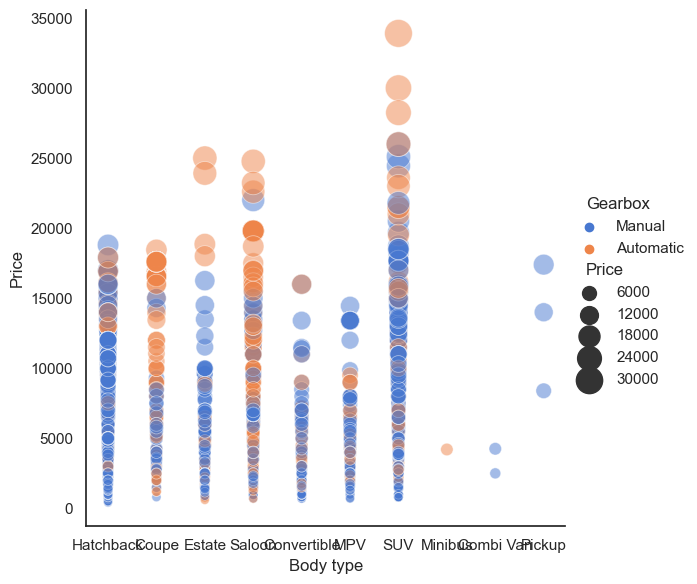

In [150]:
sns.set_theme(style='white')
sns.relplot(x='Body type', y='Price', hue='Gearbox', size='Price',
            sizes=(40, 400), alpha=.5, palette='muted',
            height=6, data=prices)

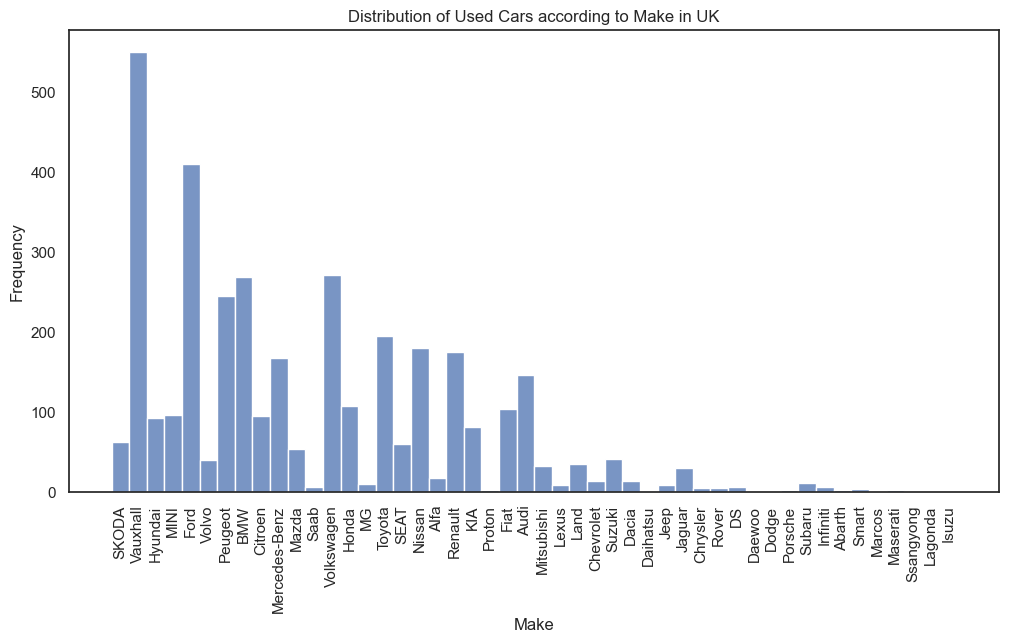

In [151]:
# Distribution of Used Cars according to Make in UK
plt.figure(figsize=(12, 6))
sns.histplot(prices['Make'], bins=30)
plt.title('Distribution of Used Cars according to Make in UK')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


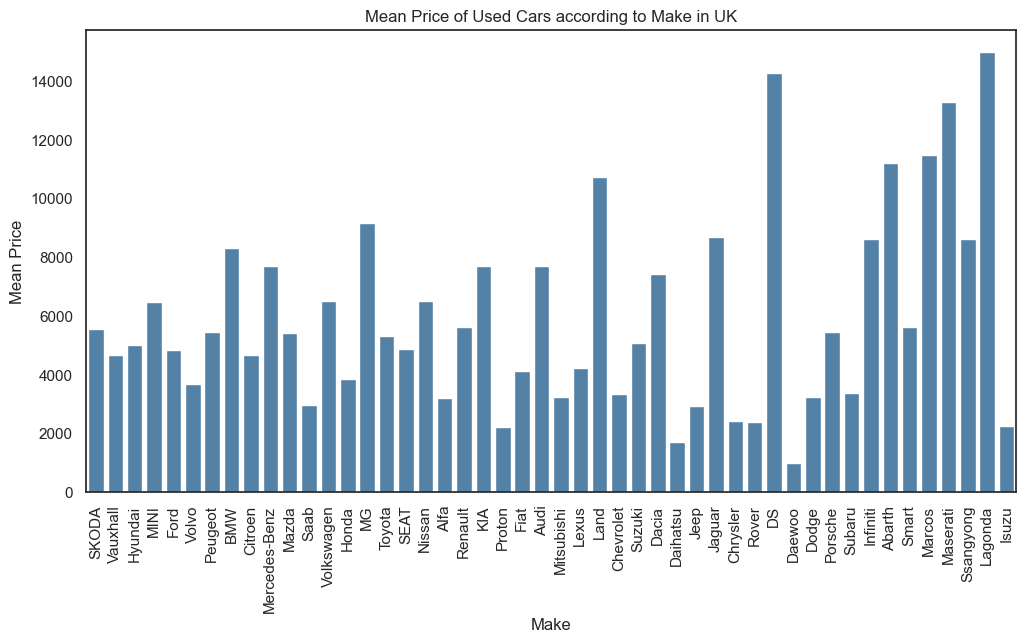

In [152]:
# Mean Price of Used Cars according to Make in UK
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=prices, errorbar=None, color = 'steelblue')
plt.title('Mean Price of Used Cars according to Make in UK')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

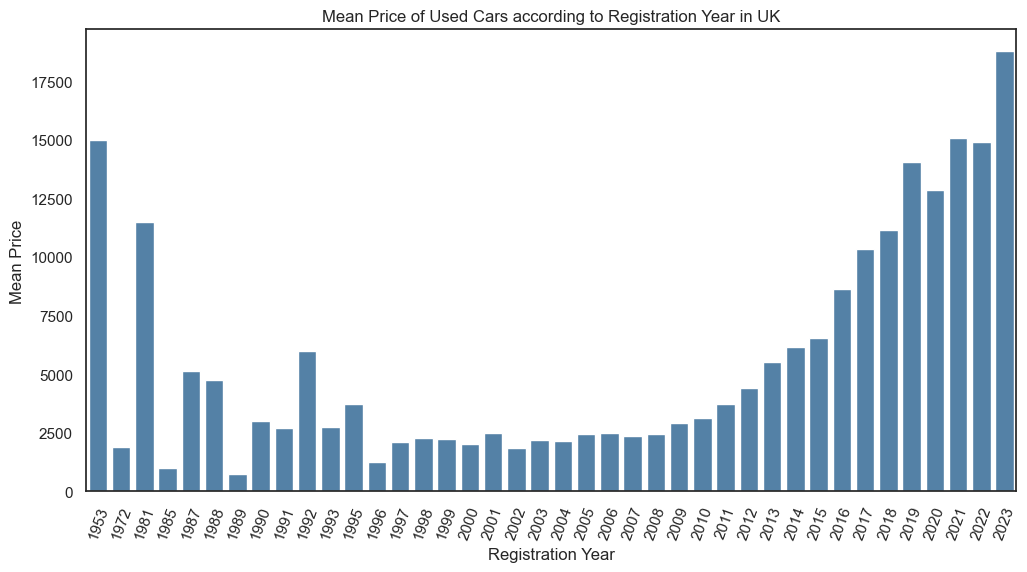

In [153]:
# Mean Price of Used Cars according to Registration Year in UK
plt.figure(figsize=(12, 6))
sns.barplot(x='Registration_Year', y='Price', data=prices, errorbar=None, color = 'steelblue')
plt.title('Mean Price of Used Cars according to Registration Year in UK')
plt.xlabel('Registration Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=70)
plt.show()

In [154]:
# Making a list for fuel types
fuel_types = []
for fuel in prices['Fuel type']:
    if fuel not in fuel_types:
        fuel_types.append(fuel)
print(fuel_types)

# Count the values of the fuel types
# count_of_fuel_types = []
# for value in fuel_types:
#     count_of_fuel_types.append(prices.value_counts('Fuel type')[value])
# print(count_of_fuel_types)

# Create a dictionary for fuel types and counts
fuel_type_dict = {}
for i in fuel_types:
    fuel_type_dict[i] = prices.value_counts('Fuel type')[i]
    
print(fuel_type_dict)


['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid', 'Electric', 'Diesel Hybrid']
{'Diesel': 1218, 'Petrol': 2361, 'Petrol Plug-in Hybrid': 27, 'Petrol Hybrid': 47, 'Electric': 31, 'Diesel Hybrid': 1}


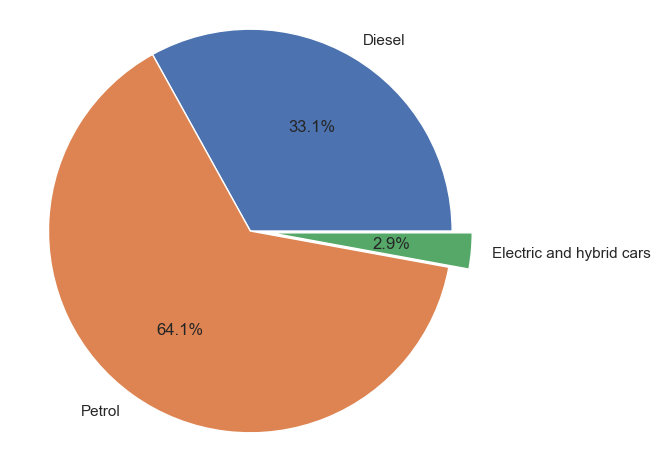

In [155]:
# Group together all elements in the dictionary whose value is less than 50
import itertools

# Dictionary comprehension for fuel types
newdic={}
for key, group in itertools.groupby(fuel_type_dict, lambda k: 'Electric and hybrid cars' if (fuel_type_dict[k]<50) else k):
     newdic[key] = sum([fuel_type_dict[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,.1), startangle=0)
ax.axis('equal')
plt.tight_layout()

plt.show()

## 5 most expensive and cheapest cars

In [156]:
# 5 most expensive cars in descending order
prices.nlargest(5, 'Price')


,Make,Model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine (L),Gearbox,Doors,Seats,Emission Class,Service history
3210,Mercedes-Benz,GLE,33900,92000,2019,1.0,Diesel,SUV,2.0,Automatic,5.0,5.0,Euro 6,0
2934,Land,Rover,30000,46000,2017,2.0,Diesel,SUV,2.0,Automatic,5.0,5.0,Euro 6,0
3222,BMW,X3,28240,45155,2019,1.0,Diesel,SUV,2.0,Automatic,5.0,5.0,Euro 6,0
3100,SEAT,Ateca,25995,222,2023,0.0,Petrol,SUV,1.5,Manual,5.0,5.0,Euro 6,0
3228,Land,Rover,25995,36363,2015,0.0,Diesel,SUV,3.0,Automatic,5.0,5.0,Euro 5,0


In [157]:
# 5 cheapest cars in ascending order
prices.sort_values('Price', ascending=True).head(5)

,Make,Model,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine (L),Gearbox,Doors,Seats,Emission Class,Service history
3243,SEAT,Ibiza,400,120842,2010,4.0,Diesel,Hatchback,1.2,Manual,3.0,5.0,Euro 5,0
3276,Vauxhall,Astra,450,115000,2005,0.0,Diesel,Hatchback,1.7,Manual,5.0,5.0,Euro 4,0
1236,Vauxhall,Astra,495,97000,2011,7.0,Diesel,Hatchback,1.7,Manual,5.0,5.0,Euro 5,0
3244,Ford,Fiesta,499,111875,2007,4.0,Petrol,Hatchback,1.4,Manual,3.0,5.0,Euro 4,0
3427,Renault,Clio,500,115083,2007,7.0,Petrol,Hatchback,1.2,Manual,5.0,5.0,Euro 4,0


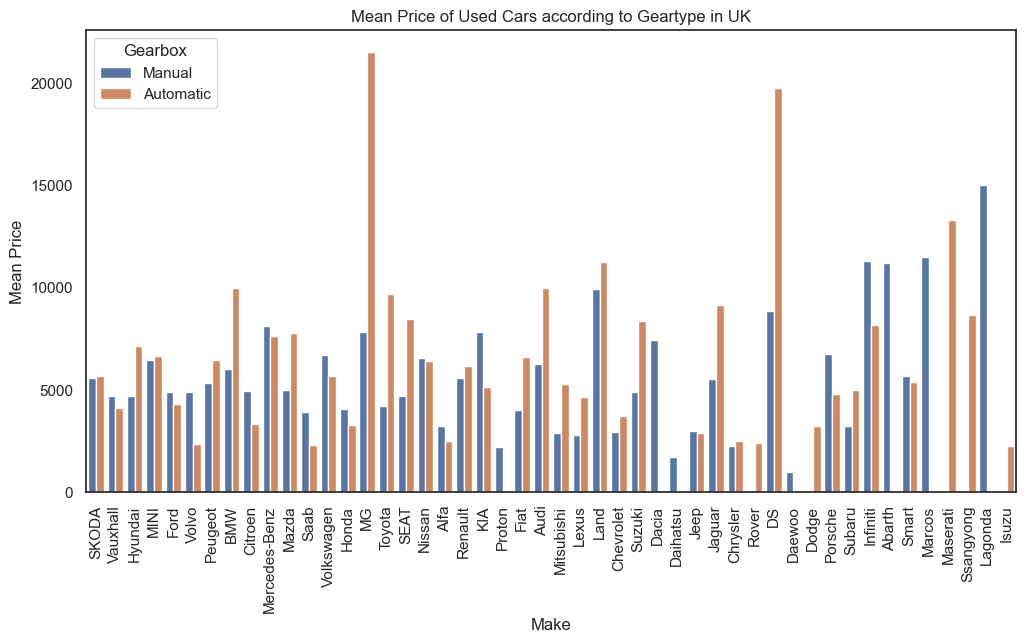

In [158]:
# Mean Price of Used Cars according to Geartype in UK
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=prices, hue='Gearbox', hue_order=['Manual', 'Automatic'], errorbar=None, palette = 'deep')
plt.title('Mean Price of Used Cars according to Geartype in UK')
plt.xlabel('Make')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()